In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('rankingcard.csv',index_col=0)

In [3]:
data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data1=data.reset_index(drop=True)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [8]:
data1.isnull().sum()/data1.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [9]:
from sklearn.impute import SimpleImputer

income_constant=np.quantile(data1['MonthlyIncome'].dropna(),0.25)
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=income_constant)
data1['MonthlyIncome']=imputer.fit_transform(np.array(data1['MonthlyIncome']).reshape(-1,1))

In [10]:
np.quantile(data1['MonthlyIncome'],0.25)

3400.0

In [11]:
data1['MonthlyIncome'].dropna()

0          9120.0
1          2600.0
2          3042.0
3          3300.0
4         63588.0
           ...   
149386     2100.0
149387     5584.0
149388     3400.0
149389     5716.0
149390     8158.0
Name: MonthlyIncome, Length: 149391, dtype: float64

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [13]:
data2=data.copy()




def regr_fillna(data):
    
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestRegressor
    
    data=pd.DataFrame(data).reset_index(drop=True).copy()
    
    nan_values=list()
    for i in data.columns:
        nan_value = data[i].isnull().sum()
        nan_values.append(nan_value)
    nan_values = list(np.argsort(nan_values))
    print(nan_values)


    while nan_values:
        columns_fill_value=data.columns[nan_values.pop(0)]
        columns_fill_0=[i for i in data.columns if i != columns_fill_value]
    
        if data[columns_fill_value].isnull().sum()==0:
            print(columns_fill_value,'无空值')
        else:
            new_data=data.copy()
            new_data[columns_fill_0]=new_data[columns_fill_0].fillna(0)
            sample=new_data[columns_fill_0]
            label=new_data[columns_fill_value]
    
    
            y_train=label[label.notnull()]
            y_test=label[label.isnull()]
            x_train=sample.iloc[y_train.index]
            x_test=sample.iloc[y_test.index]
        
            regr=RandomForestRegressor(n_estimators=100,n_jobs=-1)
            regr.fit(x_train,y_train)
            y_pred=regr.predict(x_test)
            data[columns_fill_value].iloc[y_test.index]=y_pred
            train_score=regr.score(x_train,y_train)
            print('%s列，得分:%0.2f'%(columns_fill_value,train_score))
            
    return data
        
data3=regr_fillna(data2)   
data3.info()

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 5]
SeriousDlqin2yrs 无空值
RevolvingUtilizationOfUnsecuredLines 无空值
age 无空值
NumberOfTime30-59DaysPastDueNotWorse 无空值
DebtRatio 无空值
NumberOfOpenCreditLinesAndLoans 无空值
NumberOfTimes90DaysLate 无空值
NumberRealEstateLoansOrLines 无空值
NumberOfTime60-89DaysPastDueNotWorse 无空值


/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


NumberOfDependents列，得分:0.88


/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


MonthlyIncome列，得分:0.87
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 

In [14]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.030132,0.154235,0.556494,50708.0
age,149391.0,52.306237,14.725962,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.177441,0.368234,0.875279,329664.0
MonthlyIncome,149391.0,5425.700024,13234.003003,0.0,1800.000000,4422.000000,7416.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.000000,0.000000,0.000000,98.0


In [15]:
data4=data3.copy()
data4.drop(index=data3[data3.age==0].index,inplace=True)
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149390.0,0.066999,0.250021,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149390.0,6.071121,250.264509,0.0,0.030132,0.154234,0.556491,50708.0
age,149390.0,52.306587,14.725390,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149390.0,0.393882,3.852966,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,149390.0,354.439110,2041.850084,0.0,0.177441,0.368233,0.875294,329664.0
MonthlyIncome,149390.0,5425.696179,13234.047213,0.0,1800.000000,4422.000000,7416.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149390.0,8.480909,5.136528,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149390.0,0.238122,3.826177,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149390.0,1.022384,1.130196,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149390.0,0.212504,3.810536,0.0,0.000000,0.000000,0.000000,98.0


In [16]:
data4[data4['NumberOfTimes90DaysLate']>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [17]:
data4['NumberOfTimes90DaysLate'].value_counts().sort_index()

0     141107
1       5232
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
Name: NumberOfTimes90DaysLate, dtype: int64

In [18]:
index=data4[data4['NumberOfTimes90DaysLate']>90].index
data4.drop(index=index,inplace=True)

In [19]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.030033,0.153615,0.553698,50708.0
age,149165.0,52.331076,14.714114,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.178211,0.368619,0.876994,329664.0
MonthlyIncome,149165.0,5429.807576,13243.095619,0.0,1800.000000,4435.000000,7417.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.000000,0.000000,0.000000,11.0


In [20]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149165 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [21]:
data4.reset_index(drop=True)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149160,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149161,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149162,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149163,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [22]:
label=data4['SeriousDlqin2yrs']
sample=data4[[i for i in data4.columns if i != 'SeriousDlqin2yrs']]

In [23]:
label.value_counts()[1]/label.value_counts().sum() #违约者占总用户数目

0.06618844903295008

## 上采样

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm=SMOTE(random_state=0)
sample1,label1=sm.fit_sample(sample,label)

In [26]:
print(sample1.shape)
print(sample.shape)

(278584, 10)
(149165, 10)


In [27]:
label1.value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

##  训练集合测试集

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
label1=pd.DataFrame(label1)
sample1=pd.DataFrame(sample1)

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(sample1,label1,train_size=0.8,random_state=0)

## 分箱操作

In [31]:
data_train=pd.concat([Y_train,X_train],axis=1)
data_test=pd.concat([Y_test,X_test],axis=1)

In [32]:
data_train['q_cut'],updown=pd.qcut(data_train['age'],retbins=True,q=20)

In [33]:
data_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,q_cut
85231,0,0.995940,73,1,0.516172,3771.000000,7,0,2,0,0.000000,"(68.0, 74.0]"
250180,1,0.169481,47,0,0.388638,11297.518342,14,0,3,0,2.801467,"(45.0, 47.0]"
89675,0,1.000000,39,1,1388.000000,0.140000,3,0,1,0,0.000000,"(36.0, 39.0]"
95916,0,0.180836,64,2,0.483321,5395.000000,18,0,2,0,0.000000,"(61.0, 64.0]"
255133,1,0.896787,37,1,0.504600,5600.000000,5,3,1,0,3.919397,"(36.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
211543,1,0.574908,45,1,0.221767,8000.000000,7,0,0,0,0.652309,"(43.0, 45.0]"
86293,0,0.005724,64,0,0.000667,6000.000000,3,0,0,0,0.000000,"(61.0, 64.0]"
122579,1,0.777181,36,0,0.213362,4250.000000,8,0,0,0,1.000000,"(34.0, 36.0]"
152315,1,0.621896,55,0,0.257427,6541.214948,8,0,0,0,0.000000,"(54.0, 56.0]"


In [34]:
SeriousDlqin2yrs_0=data_train[data_train['SeriousDlqin2yrs']==0].groupby(['q_cut']).count()['SeriousDlqin2yrs']
SeriousDlqin2yrs_1=data_train[data_train['SeriousDlqin2yrs']==1].groupby(['q_cut']).count()['SeriousDlqin2yrs']

In [35]:
numbins=[*zip(updown,updown[1:],SeriousDlqin2yrs_0,SeriousDlqin2yrs_1)]
numbins

[(21.0, 28.0, 4803, 8390),
 (28.0, 31.0, 4001, 6776),
 (31.0, 34.0, 4595, 7945),
 (34.0, 36.0, 3314, 5351),
 (36.0, 39.0, 5935, 8631),
 (39.0, 41.0, 4516, 6749),
 (41.0, 43.0, 4561, 6494),
 (43.0, 45.0, 5003, 6680),
 (45.0, 47.0, 5404, 7205),
 (47.0, 48.0, 2809, 3561),
 (48.0, 50.0, 5619, 7063),
 (50.0, 52.0, 5400, 6610),
 (52.0, 54.0, 5349, 5539),
 (54.0, 56.0, 5294, 4795),
 (56.0, 58.0, 5145, 4064),
 (58.0, 61.0, 7636, 5479),
 (61.0, 64.0, 7890, 3714),
 (64.0, 68.0, 7621, 2678),
 (68.0, 74.0, 7745, 2109),
 (74.0, 109.0, 8817, 1577)]

In [36]:
df=pd.DataFrame({'low':updown[0:-1],'high':updown[1:],'SD2_0':SeriousDlqin2yrs_0.values,'SD2_1':SeriousDlqin2yrs_1.values})

In [37]:
df_test=df.copy()
df_test['SD2_0'].iloc[[0,8,19]]=0
df_test['SD2_1'].iloc[[10,17,19,3]]=0
df_test

/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,low,high,SD2_0,SD2_1
0,21.0,28.0,0,8390
1,28.0,31.0,4001,6776
2,31.0,34.0,4595,7945
3,34.0,36.0,3314,0
4,36.0,39.0,5935,8631
5,39.0,41.0,4516,6749
6,41.0,43.0,4561,6494
7,43.0,45.0,5003,6680
8,45.0,47.0,0,7205
9,47.0,48.0,2809,3561


In [38]:
# 确保每个箱中都有0和1

df_test=df.copy()
df_test['SD2_0'].iloc[[0,8,19]]=0
df_test['SD2_1'].iloc[[10,17,19,3]]=0



for i in range(len(df_test)-1,0,-1):
    
    SD2_0_value=df_test['SD2_0'].iloc[i]
    SD2_1_value=df_test['SD2_1'].iloc[i]
    if SD2_0_value ==0 or SD2_1_value==0:
        df_test['SD2_0'].iloc[i-1]+=df_test['SD2_0'].iloc[i-1]
        df_test['SD2_1'].iloc[i-1]+=df_test['SD2_1'].iloc[i-1]
        df_test['high'].iloc[i-1]=df_test['high'].iloc[i]
        df_test.drop(index=i,inplace=True)
        
if df_test['SD2_0'].iloc[0]==0 or df_test['SD2_1'].iloc[0]==0:
        df_test['SD2_0'].iloc[1]+=df_test['SD2_0'].iloc[0]
        df_test['SD2_1'].iloc[1]+=df_test['SD2_1'].iloc[0]
        df_test['low'].iloc[1]=df_test['low'].iloc[0]
        df_test.drop(index=0,inplace=True)
    
df_test.reset_index(drop=True,inplace=True)



df_test        

/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,low,high,SD2_0,SD2_1
0,21.0,31.0,4001,15166
1,31.0,36.0,9190,15890
2,36.0,39.0,5935,8631
3,39.0,41.0,4516,6749
4,41.0,43.0,4561,6494
5,43.0,47.0,10006,13360
6,47.0,50.0,5618,7122
7,50.0,52.0,5400,6610
8,52.0,54.0,5349,5539
9,54.0,56.0,5294,4795


In [39]:
df

,low,high,SD2_0,SD2_1
0,21.0,28.0,4803,8390
1,28.0,31.0,4001,6776
2,31.0,34.0,4595,7945
3,34.0,36.0,3314,5351
4,36.0,39.0,5935,8631
5,39.0,41.0,4516,6749
6,41.0,43.0,4561,6494
7,43.0,45.0,5003,6680
8,45.0,47.0,5404,7205
9,47.0,48.0,2809,3561


In [40]:
df['total']=df.SD2_0+df.SD2_1
df['percentage']=df['total']/df['total'].sum()
df['bad_rate']=df['SD2_1']/df['total']
df['good%']=df.SD2_0/df.SD2_0.sum()
df['bad%']=df.SD2_1/df.SD2_1.sum()
df['woe']=np.log(df['good%']/df['bad%'])
df

,low,high,SD2_0,SD2_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4803,8390,13193,0.059197,0.635943,0.043093,0.075307,-0.558222
1,28.0,31.0,4001,6776,10777,0.048356,0.628746,0.035897,0.060820,-0.527264
2,31.0,34.0,4595,7945,12540,0.056267,0.633573,0.041227,0.071313,-0.547996
3,34.0,36.0,3314,5351,8665,0.038880,0.617542,0.029733,0.048030,-0.479549
4,36.0,39.0,5935,8631,14566,0.065357,0.592544,0.053249,0.077471,-0.374915
5,39.0,41.0,4516,6749,11265,0.050546,0.599112,0.040518,0.060578,-0.402189
6,41.0,43.0,4561,6494,11055,0.049604,0.587427,0.040922,0.058289,-0.353759
7,43.0,45.0,5003,6680,11683,0.052421,0.571771,0.044887,0.059959,-0.289502
8,45.0,47.0,5404,7205,12609,0.056576,0.571417,0.048485,0.064671,-0.288058
9,47.0,48.0,2809,3561,6370,0.028582,0.559027,0.025203,0.031963,-0.237635


In [41]:
iv=np.sum((df['good%']-df['bad%'])*df['woe'])
iv

0.35674835080366385

In [42]:
df

,low,high,SD2_0,SD2_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4803,8390,13193,0.059197,0.635943,0.043093,0.075307,-0.558222
1,28.0,31.0,4001,6776,10777,0.048356,0.628746,0.035897,0.060820,-0.527264
2,31.0,34.0,4595,7945,12540,0.056267,0.633573,0.041227,0.071313,-0.547996
3,34.0,36.0,3314,5351,8665,0.038880,0.617542,0.029733,0.048030,-0.479549
4,36.0,39.0,5935,8631,14566,0.065357,0.592544,0.053249,0.077471,-0.374915
5,39.0,41.0,4516,6749,11265,0.050546,0.599112,0.040518,0.060578,-0.402189
6,41.0,43.0,4561,6494,11055,0.049604,0.587427,0.040922,0.058289,-0.353759
7,43.0,45.0,5003,6680,11683,0.052421,0.571771,0.044887,0.059959,-0.289502
8,45.0,47.0,5404,7205,12609,0.056576,0.571417,0.048485,0.064671,-0.288058
9,47.0,48.0,2809,3561,6370,0.028582,0.559027,0.025203,0.031963,-0.237635


In [43]:
# 卡方检验
from scipy.stats import chi2_contingency
p_values=list()
for i in range(len(df)-1):
    SD2=df[['SD2_0','SD2_1']].iloc[i]
    SD2_1=df[['SD2_0','SD2_1']].iloc[i+1]
    p_value=chi2_contingency([SD2,SD2_1])[1]
    p_values.append(p_value)
print(np.argsort(p_values))
print([p_values[i] for i in np.argsort(p_values)])
print(len(p_values))

[15 18 16 17 11 12 13  3 14  6  2  5  8  0  4 10  1  9  7]
[1.43351582892023e-56, 1.9792343747786106e-30, 2.0310046529745037e-22, 1.9490079997814072e-14, 3.1057428006949654e-10, 1.3746961359995611e-06, 2.4229334729688308e-06, 0.00017670818021444659, 0.0004895665992016165, 0.017468445216502263, 0.01834980437159373, 0.07783871877589855, 0.10709661688715956, 0.2558147481580838, 0.2919866683930584, 0.30627743548856967, 0.4544763726931914, 0.7954119570912166, 0.9659512476481913]
19


In [44]:
df2=df.copy()

for i in range(len(p_values)-1,0,-1):
    if p_values[i] > 0.05:
        index=[j for j in df.columns if j != 'low' and j != 'high']
        df2[index].iloc[i-1]+=df2[index].iloc[i]
        df2['high'].iloc[i-1]=df2['high'].iloc[i]
        df2.drop(index=i,inplace=True)
df2.reset_index(drop=True,inplace=True)
df2

/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,low,high,SD2_0,SD2_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,31.0,4803,8390,13193,0.059197,0.635943,0.043093,0.075307,-0.558222
1,31.0,34.0,4595,7945,12540,0.056267,0.633573,0.041227,0.071313,-0.547996
2,34.0,41.0,3314,5351,8665,0.038880,0.617542,0.029733,0.048030,-0.479549
3,41.0,50.0,4561,6494,11055,0.049604,0.587427,0.040922,0.058289,-0.353759
4,50.0,52.0,5400,6610,12010,0.053889,0.550375,0.048449,0.059330,-0.202606
5,52.0,54.0,5349,5539,10888,0.048854,0.508725,0.047992,0.049717,-0.035326
6,54.0,56.0,5294,4795,10089,0.045269,0.475270,0.047498,0.043039,0.098579
7,56.0,58.0,5145,4064,9209,0.041321,0.441307,0.046161,0.036478,0.235436
8,58.0,61.0,7636,5479,13115,0.058847,0.417766,0.068511,0.049179,0.331530
9,61.0,64.0,7890,3714,11604,0.052067,0.320062,0.070790,0.033336,0.753065


/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0.0, 0.22722942151617667, 0.31961120462640114, 0.33618933615677893, 0.34347213820396993, 0.3491720998358628, 0.35251647508988704, 0.3541015006343058, 0.35556658551566717, 0.35598772291530667, 0.3562716077664081, 0.35649589256262315, 0.35663323753150933, 0.35667117435630946, 0.3566996953190762, 0.3567208939324594, 0.35673574132103925, 0.35674692061541563, 0.3567482940308541, 0.35674835080366385]


,low,high,SD2_0,SD2_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4803,8390,13193,0.059197,0.635943,0.043093,0.075307,-0.558222
1,28.0,31.0,4001,6776,10777,0.048356,0.628746,0.035897,0.060820,-0.527264
2,31.0,34.0,4595,7945,12540,0.056267,0.633573,0.041227,0.071313,-0.547996
3,34.0,36.0,3314,5351,8665,0.038880,0.617542,0.029733,0.048030,-0.479549
4,36.0,39.0,5935,8631,14566,0.065357,0.592544,0.053249,0.077471,-0.374915
5,39.0,41.0,4516,6749,11265,0.050546,0.599112,0.040518,0.060578,-0.402189
6,41.0,43.0,4561,6494,11055,0.049604,0.587427,0.040922,0.058289,-0.353759
7,43.0,45.0,5003,6680,11683,0.052421,0.571771,0.044887,0.059959,-0.289502
8,45.0,47.0,5404,7205,12609,0.056576,0.571417,0.048485,0.064671,-0.288058
9,47.0,48.0,2809,3561,6370,0.028582,0.559027,0.025203,0.031963,-0.237635


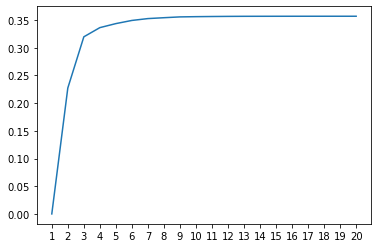

In [45]:
iv_list=list()
len_df2_list=list()

for m in range(1,21):
    df2=df.copy()
    df2=df2[['low','high','SD2_0','SD2_1']]
    
    while len(df2)>m:
        p_values=list()
        for i in range(len(df2)-1):
            SD2=df2[['SD2_0','SD2_1']].iloc[i]
            SD2_1=df2[['SD2_0','SD2_1']].iloc[i+1]
            p_value=chi2_contingency([SD2,SD2_1])[1]
            p_values.append(p_value)
        #print(p_values)
    
           
        k=np.argsort(p_values)[-1]
        df2['SD2_0'].iloc[k+1]+=df2['SD2_0'].iloc[k]
        df2['SD2_1'].iloc[k+1]+=df2['SD2_1'].iloc[k]
        df2['low'].iloc[k+1]=df2['low'].iloc[k]
        df2.drop(index=k,inplace=True)
        df2.reset_index(drop=True,inplace=True)
    
    df2['total']=df2.SD2_0+df2.SD2_1
    df2['percentage']=df2['total']/df2['total'].sum()
    df2['bad_rate']=df2['SD2_1']/df2['total']
    df2['good%']=df2.SD2_0/df2.SD2_0.sum()
    df2['bad%']=df2.SD2_1/df2.SD2_1.sum()
    df2['woe']=np.log(df2['good%']/df2['bad%'])
    iv=np.sum((df2['good%']-df2['bad%'])*df2['woe']) 
    iv_list.append(iv)
    len_df2_list.append(m)
    
    
# df2,iv
plt.plot(len_df2_list,iv_list)
plt.xticks(len_df2_list)
print(len_df2_list,iv_list)
df2

In [48]:
for m in range(6,7):
    df2=df.copy()
    df2=df2[['low','high','SD2_0','SD2_1']]
    
    while len(df2)>m:
        p_values=list()
        for i in range(len(df2)-1):
            SD2=df2[['SD2_0','SD2_1']].iloc[i]
            SD2_1=df2[['SD2_0','SD2_1']].iloc[i+1]
            p_value=chi2_contingency([SD2,SD2_1])[1]
            p_values.append(p_value)
        #print(p_values)
    
           
        k=np.argsort(p_values)[-1]
        df2['SD2_0'].iloc[k+1]+=df2['SD2_0'].iloc[k]
        df2['SD2_1'].iloc[k+1]+=df2['SD2_1'].iloc[k]
        df2['low'].iloc[k+1]=df2['low'].iloc[k]
        df2.drop(index=k,inplace=True)
        df2.reset_index(drop=True,inplace=True)
    
    df2['total']=df2.SD2_0+df2.SD2_1
    df2['percentage']=df2['total']/df2['total'].sum()
    df2['bad_rate']=df2['SD2_1']/df2['total']
    df2['good%']=df2.SD2_0/df2.SD2_0.sum()
    df2['bad%']=df2.SD2_1/df2.SD2_1.sum()
    df2['woe']=np.log(df2['good%']/df2['bad%'])
    iv=np.sum((df2['good%']-df2['bad%'])*df2['woe']) 
    iv_list.append(iv)
    len_df2_list.append(m)

print(iv_list)
print(len_df2_list)
df2

[0.0, 0.22722942151617667, 0.31961120462640114, 0.33618933615677893, 0.34347213820396993, 0.3491720998358628, 0.35251647508988704, 0.3541015006343058, 0.35556658551566717, 0.35598772291530667, 0.3562716077664081, 0.35649589256262315, 0.35663323753150933, 0.35667117435630946, 0.3566996953190762, 0.3567208939324594, 0.35673574132103925, 0.35674692061541563, 0.3567482940308541, 0.35674835080366385, 0.3491720998358628]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 6]


/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,low,high,SD2_0,SD2_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,16713,28462,45175,0.202699,0.630039,0.149950,0.255471,-0.532805
1,36.0,52.0,39247,52993,92240,0.413879,0.574512,0.352127,0.475657,-0.300707
2,52.0,61.0,23424,19877,43301,0.194291,0.459043,0.210162,0.178413,0.163776
3,61.0,64.0,7890,3714,11604,0.052067,0.320062,0.070790,0.033336,0.753065
4,64.0,74.0,15366,4787,20153,0.090426,0.237533,0.137865,0.042967,1.165832
5,74.0,109.0,8817,1577,10394,0.046638,0.151722,0.079107,0.014155,1.720736


222867

In [49]:
pd.qcut?

Signature:
pd.qcut(
    x,
    q,
    labels=None,
    retbins: bool = False,
    precision: int = 3,
    duplicates: str = 'raise',
)
Docstring:
Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based
on sample quantiles. For example 1000 values for 10 quantiles would
produce a Categorical object indicating quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : int or list-like of float
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
labels : array or False, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins. If True, raises an error.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    The pr